# Processing RNAseq data 

First step is to create a directory to work in:

In [3]:
mkdir -p /mnt/storage/$USER/jupyternotebooks/RNA-seq2
cd /mnt/storage/$USER/jupyternotebooks/RNA-seq2

### symlink the fastq files

First step is to create a symbolic link to the raw fastq files. A symbolic link instead of a full copy (to not clog up the system) 

In [4]:
ln -sf /mnt/nfs/data/RNA-seq/MCF7/*.fastq .


In [2]:
fastq-dump --split-files -X 5 SRR867127 -Z

Read 5 spots for SRR867127
Written 5 spots for SRR867127
@SRR867127.1 HWI-ST571:122:D0HFTACXX:4:1101:1454:2139 length=50
CAGCTTTCTAGGGCTGGAAGTCTCAAATAGAACTCACCTGTTCCCCAACC
+SRR867127.1 HWI-ST571:122:D0HFTACXX:4:1101:1454:2139 length=50
@@@?DFFDF?HFHIIIGG>FCAFGHG@EHGHIDE?FHHDHF@BFF@@?DG
@SRR867127.2 HWI-ST571:122:D0HFTACXX:4:1101:1439:2168 length=50
GAATTAAAAACTGGTATCAGCGATGTTTTTGCTAAAAATGATCTTGCTGT
+SRR867127.2 HWI-ST571:122:D0HFTACXX:4:1101:1439:2168 length=50
@@CDDFDDDHHHFGAFGHHIDIH<EGHIIBGIIHEGCFHA>FGHIIICHI
@SRR867127.3 HWI-ST571:122:D0HFTACXX:4:1101:1455:2177 length=50
CACGGCCAGGCCCCCCGCTGTGGATAAGTGGCTCTTGCCATAGGGGTGGT
+SRR867127.3 HWI-ST571:122:D0HFTACXX:4:1101:1455:2177 length=50
@@@FFDFFFDHFFGIGIGEHDHGHJEHI@GIIIGIIIIJJGGH>EH'9A9
@SRR867127.4 HWI-ST571:122:D0HFTACXX:4:1101:1427:2220 length=50
CACAAACTGGATGCTGCGCTTGGTTTTGATGGTGGCAATGGCAGCATTGA
+SRR867127.4 HWI-ST571:122:D0HFTACXX:4:1101:1427:2220 length=50
@@@FFFFDFBDHHGGHEEHIJIGFGHGDGIGGFHGHGGIJJIJICHIJHE
@SRR867127.5 HWI-ST571:

In [4]:
fastq-dump -h


Usage:
  fastq-dump [options] <path> [<path>...]
  fastq-dump [options] <accession>

INPUT
  -A|--accession <accession>       Replaces accession derived from <path> in 
                                   filename(s) and deflines (only for single 
                                   table dump) 
  --table <table-name>             Table name within cSRA object, default is 
                                   "SEQUENCE" 

PROCESSING

Read Splitting                     Sequence data may be used in raw form or
                                     split into individual reads
  --split-spot                     Split spots into individual reads 

Full Spot Filters                  Applied to the full spot independently
                                     of --split-spot
  -N|--minSpotId <rowid>           Minimum spot id 
  -X|--maxSpotId <rowid>           Maximum spot id 
  --spot-groups <[list]>           Filter by SPOT_GROUP (member): name[,...] 
  -W|--clip                        Remove ada

In [5]:
ls -lt 

total 0
lrwxrwxrwx 1 u0038182 domain users 36 Sep 28 15:55 NS1.fastq -> /mnt/nfs/data/RNA-seq/MCF7/NS1.fastq
lrwxrwxrwx 1 u0038182 domain users 36 Sep 28 15:55 NS2.fastq -> /mnt/nfs/data/RNA-seq/MCF7/NS2.fastq
lrwxrwxrwx 1 u0038182 domain users 35 Sep 28 15:55 S1.fastq -> /mnt/nfs/data/RNA-seq/MCF7/S1.fastq
lrwxrwxrwx 1 u0038182 domain users 35 Sep 28 15:55 S2.fastq -> /mnt/nfs/data/RNA-seq/MCF7/S2.fastq
lrwxrwxrwx 1 u0038182 domain users 37 Sep 28 15:55 test.fastq -> /mnt/nfs/data/RNA-seq/MCF7/test.fastq


In [6]:
wc -l test.fastq

100000 test.fastq


In [7]:
head test.fastq

@SRR867127.1 HWI-ST571:122:D0HFTACXX:4:1101:1454:2139 length=50
CAGCTTTCTAGGGCTGGAAGTCTCAAATAGAACTCACCTGTTCCCCAACC
+SRR867127.1 HWI-ST571:122:D0HFTACXX:4:1101:1454:2139 length=50
@@@?DFFDF?HFHIIIGG>FCAFGHG@EHGHIDE?FHHDHF@BFF@@?DG
@SRR867127.2 HWI-ST571:122:D0HFTACXX:4:1101:1439:2168 length=50
GAATTAAAAACTGGTATCAGCGATGTTTTTGCTAAAAATGATCTTGCTGT
+SRR867127.2 HWI-ST571:122:D0HFTACXX:4:1101:1439:2168 length=50
@@CDDFDDDHHHFGAFGHHIDIH<EGHIIBGIIHEGCFHA>FGHIIICHI
@SRR867127.3 HWI-ST571:122:D0HFTACXX:4:1101:1455:2177 length=50
CACGGCCAGGCCCCCCGCTGTGGATAAGTGGCTCTTGCCATAGGGGTGGT


Note that there is a test.fastq file - this is a small subset of NS1.fastq to be able to run a few operation in class without overly burdening the system.

## Download from SRA

In [36]:
vdb-config -s /repository/user/cache-disabled=true

## Quality control using FASTQC

After receiving sequencing data your first step should be to check your data quality. This step helps to identify potential technical biases that might affect your analysis. Based on this evaluation you might need to pre-process your data to improve the quality. 

[FastQC](http://www.bioinformatics.babraham.ac.uk/projects/fastqc/) is a tool that produces a quality analysis report on FASTQ files.

    fastqc fastqfile -o outputdir  

Useful links:

* [FastQC report for a good Illumina dataset](http://www.bioinformatics.babraham.ac.uk/projects/fastqc/ "Title")
* [FastQC report for a bad Illumina dataset](http://www.bioinformatics.babraham.ac.uk/projects/fastqc/bad_sequence_fastqc.html)
* [Adapter contaminated run](http://www.bioinformatics.babraham.ac.uk/projects/fastqc/RNA-Seq_fastqc.html)
* [Online documentation for each FastQC report](http://www.bioinformatics.babraham.ac.uk/projects/fastqc/Help/3%20Analysis%20Modules/)
* [Video tutorial](http://www.youtube.com/watch?v=bz93ReOv87Y)

Look through the individual reports and evaluate them according to your experiment type.

The FastQC reports I find most useful are:

* The Per base sequence quality report, which can help you decide if sequence trimming is needed before alignment.
* The Sequences Duplication Levels report, which helps you evaluate library enrichment / complexity. But note that different experiment types are expected to have vastly different duplication profiles.
* The Overrepresented Sequences report, which helps evaluate adapter contamination.

We will not run FastQC on the full files as this is too computationally intensive. Instead we'll run fastqc on the small test.fastq file:

Note, we're using the fastqc program in `/usr/local/bin/FastQC/` to ensure we have the correct version. 

In [8]:
/usr/bin/fastqc -o . test.fastq

Started analysis of test.fastq
Approx 5% complete for test.fastq
Approx 10% complete for test.fastq
Approx 15% complete for test.fastq
Approx 20% complete for test.fastq
Approx 25% complete for test.fastq
Approx 30% complete for test.fastq
Approx 35% complete for test.fastq
Approx 40% complete for test.fastq
Approx 45% complete for test.fastq
Approx 50% complete for test.fastq
Approx 55% complete for test.fastq
Approx 60% complete for test.fastq
Approx 65% complete for test.fastq
Approx 70% complete for test.fastq
Approx 75% complete for test.fastq
Approx 80% complete for test.fastq
Approx 85% complete for test.fastq
Approx 90% complete for test.fastq
Approx 95% complete for test.fastq
Approx 100% complete for test.fastq
Analysis complete for test.fastq


In [9]:
ls -lt | head

total 1216
-rw-r--r-- 1 u0038182 domain users 720103 Sep 28 15:59 test_fastqc.html
-rw-r--r-- 1 u0038182 domain users 450188 Sep 28 15:59 test_fastqc.zip
lrwxrwxrwx 1 u0038182 domain users     36 Sep 28 15:55 NS1.fastq -> /mnt/nfs/data/RNA-seq/MCF7/NS1.fastq
lrwxrwxrwx 1 u0038182 domain users     36 Sep 28 15:55 NS2.fastq -> /mnt/nfs/data/RNA-seq/MCF7/NS2.fastq
lrwxrwxrwx 1 u0038182 domain users     35 Sep 28 15:55 S1.fastq -> /mnt/nfs/data/RNA-seq/MCF7/S1.fastq
lrwxrwxrwx 1 u0038182 domain users     35 Sep 28 15:55 S2.fastq -> /mnt/nfs/data/RNA-seq/MCF7/S2.fastq
lrwxrwxrwx 1 u0038182 domain users     37 Sep 28 15:55 test.fastq -> /mnt/nfs/data/RNA-seq/MCF7/test.fastq


Download the .zip file and open the .html file to check some FASTQ quality stats. Below you can see boxplots of the Illumina base quality scores

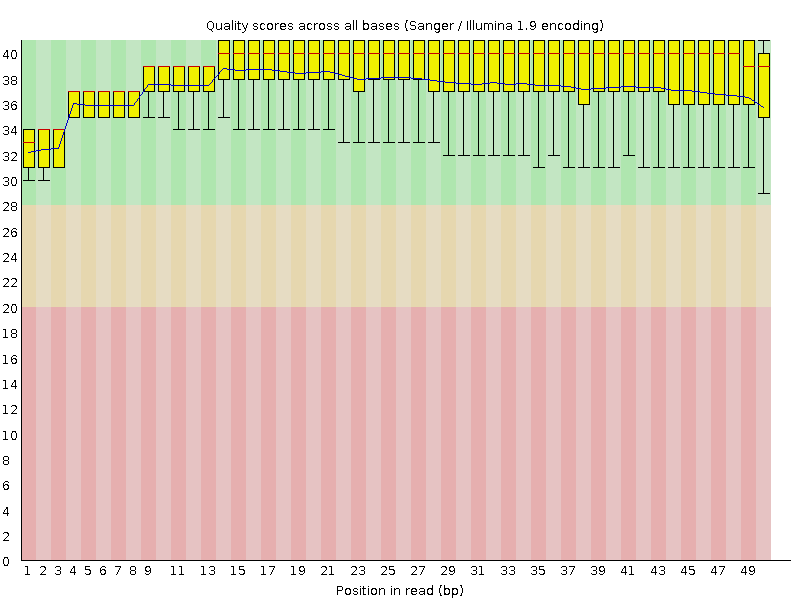

Now download the test_fastqc.html file to you computer and open it in a web browser.

## Mapping to the genome

We will use STAR to map to the genome. 

STAR also needs a database with the human genome and gene annotation. Creating one takes a long time, so this is also pregenerated and located here: `/mnt/nfs/mfiers/STAR/hg19_star_db`.

The STAR manual gives an extensive account of all options: https://github.com/alexdobin/STAR/blob/master/doc/STARmanual.pdf

Again, running STAR all toghether may crash the server, so we will run with the test fastq file.

In [9]:
# You don't need to run this, but this is a trick to load genome into memory, 
# so if we all run STAR we can the genome will not be loaded X times and overload
# the server:
STAR --genomeLoad LoadAndExit --genomeDir /mnt/nfs/mfiers/STAR/hg19_star_db

Sep 26 18:08:19 ..... started STAR run
Sep 26 18:08:19 ..... loading genome


In [10]:
STAR --genomeDir /mnt/nfs/mfiers/STAR/hg19_star_db \
     --genomeLoad LoadAndKeep \
     --runThreadN 2 \
     --readFilesIn test.fastq \
     --outFileNamePrefix test.

Sep 26 18:08:28 ..... started STAR run
Sep 26 18:08:28 ..... loading genome
Sep 26 18:08:29 ..... started mapping
Sep 26 18:08:30 ..... finished successfully


In [45]:
STAR

Usage: STAR  [options]... --genomeDir REFERENCE   --readFilesIn R1.fq R2.fq
Spliced Transcripts Alignment to a Reference (c) Alexander Dobin, 2009-2015

### versions
versionSTAR             020201
    int>0: STAR release numeric ID. Please do not change this value!
versionGenome           020101 020200
    int>0: oldest value of the Genome version compatible with this STAR release. Please do not change this value!

### Parameter Files
parametersFiles          -
    string: name of a user-defined parameters file, "-": none. Can only be defined on the command line.

### System
sysShell            -
    string: path to the shell binary, preferably bash, e.g. /bin/bash.
                    - ... the default shell is executed, typically /bin/sh. This was reported to fail on some Ubuntu systems - then you need to specify path to bash.

### Run Parameters

runMode                         alignReads
    string: type of the run:
                                alignReads             ... map rea

The output file is now in `test.Aligned.out.sam`. Apart from that we have a number of additional log files generated.

In [11]:
ls -l test.*

-rw-r--r-- 1 u0038182 domain users 5239034 Sep 26 18:08 test.Aligned.out.sam
lrwxrwxrwx 1 u0038182 domain users      37 Sep 26 18:07 test.fastq -> /mnt/nfs/data/RNA-seq/MCF7/test.fastq
-rw-r--r-- 1 u0038182 domain users    1830 Sep 26 18:08 test.Log.final.out
-rw-r--r-- 1 u0038182 domain users   16039 Sep 26 18:08 test.Log.out
-rw-r--r-- 1 u0038182 domain users     246 Sep 26 18:08 test.Log.progress.out
-rw-r--r-- 1 u0038182 domain users  134953 Sep 26 18:08 test.SJ.out.tab


### SAM file structure

A SAM file is a text file containing the alignment of all reads. A SAM files starts with a header:(Please do not use `cat` as this will crash your notebook)

In [12]:
head -40 test.Aligned.out.sam | grep '^@'

@HD	VN:1.4
@SQ	SN:chrM	LN:16571
@SQ	SN:chr1	LN:249250621
@SQ	SN:chr2	LN:243199373
@SQ	SN:chr3	LN:198022430
@SQ	SN:chr4	LN:191154276
@SQ	SN:chr5	LN:180915260
@SQ	SN:chr6	LN:171115067
@SQ	SN:chr7	LN:159138663
@SQ	SN:chr8	LN:146364022
@SQ	SN:chr9	LN:141213431
@SQ	SN:chr10	LN:135534747
@SQ	SN:chr11	LN:135006516
@SQ	SN:chr12	LN:133851895
@SQ	SN:chr13	LN:115169878
@SQ	SN:chr14	LN:107349540
@SQ	SN:chr15	LN:102531392
@SQ	SN:chr16	LN:90354753
@SQ	SN:chr17	LN:81195210
@SQ	SN:chr18	LN:78077248
@SQ	SN:chr19	LN:59128983
@SQ	SN:chr20	LN:63025520
@SQ	SN:chr21	LN:48129895
@SQ	SN:chr22	LN:51304566
@SQ	SN:chrX	LN:155270560
@SQ	SN:chrY	LN:59373566
@PG	ID:STAR	PN:STAR	VN:STAR_2.5.4b	CL:STAR   --runThreadN 2   --genomeDir /mnt/nfs/mfiers/STAR/hg19_star_db   --genomeLoad LoadAndKeep   --readFilesIn test.fastq      --outFileNamePrefix test.
@CO	user command line: STAR --genomeDir /mnt/nfs/mfiers/STAR/hg19_star_db --genomeLoad LoadAndKeep --runThreadN 2 --readFilesIn test.fastq --outFileNamePrefix test.


Followed by the alignments:

In [13]:
head -100 test.Aligned.out.sam | grep -v '^@'

SRR867127.1	16	chr11	73373455	255	50M	*	0	0	GGTTGGGGAACAGGTGAGTTCTATTTGAGACTTCCAGCCCTAGAAAGCTG	GD?@@FFB@FHDHHF?EDIHGHE@GHGFACF>GGIIIHFH?FDFFD?@@@	NH:i:1	HI:i:1	AS:i:49	nM:i:0
SRR867127.2	16	chr2	232324890	255	50M	*	0	0	ACAGCAAGATCATTTTTAGCAAAAACATCGCTGATACCAGTTTTTAATTC	IHCIIIHGF>AHFCGEHIIGBIIHGE<HIDIHHGFAGFHHHDDDFDDC@@	NH:i:1	HI:i:1	AS:i:49	nM:i:0
SRR867127.3	16	chr8	37556053	255	50M	*	0	0	ACCACCCCTATGGCAAGAGCCACTTATCCACAGCGGGGGGCCTGGCCGTG	9A9'HE>HGGJJIIIIGIIIG@IHEJHGHDHEGIGIGFFHDFFFDFF@@@	NH:i:1	HI:i:1	AS:i:49	nM:i:0
SRR867127.4	0	chr12	49522065	255	50M	*	0	0	CACAAACTGGATGCTGCGCTTGGTTTTGATGGTGGCAATGGCAGCATTGA	@@@FFFFDFBDHHGGHEEHIJIGFGHGDGIGGFHGHGGIJJIJICHIJHE	NH:i:1	HI:i:1	AS:i:49	nM:i:0
SRR867127.5	16	chr16	3726056	255	50M	*	0	0	GGAAAACTCCTTGCAGTCGGATTTCAGGTGGATGATGATTTTTGTCCCGG	>FJIHCJJIJIJIJJJIIHJJHIGGGEGIIJIIJIGIHHHHFFFDFF@CC	NH:i:1	HI:i:1	AS:i:49	nM:i:0
SRR867127.6	16	chr17	17184449	255	50M	*	0	0	GAGCTGAGAGCTGTCGGACACTGTTCACGAACTGCTCCAGGGCAGACGCC	IHGFFGHCGDHGB>IIIDF?EHEGCGHHDHHEG

As you may notice, the SAM file is unsorted and uncompressed. To be able to quickly access the data we tend to sort the SAM file and convert it to a BAM file, which is a compressed (much smaller) version of a SAM file. The last step is to create an index for quick access.

We use `samtools` to do this. The first step sorts and outputs `bam`:

In [14]:
samtools sort -o test.bam test.Aligned.out.sam

In [15]:
samtools sort

Usage: samtools sort [options...] [in.bam]
Options:
  -l INT     Set compression level, from 0 (uncompressed) to 9 (best)
  -m INT     Set maximum memory per thread; suffix K/M/G recognized [768M]
  -n         Sort by read name
  -t TAG     Sort by value of TAG. Uses position as secondary index (or read name if -n is set)
  -o FILE    Write final output to FILE rather than standard output
  -T PREFIX  Write temporary files to PREFIX.nnnn.bam
      --input-fmt-option OPT[=VAL]
               Specify a single input file format option in the form
               of OPTION or OPTION=VALUE
  -O, --output-fmt FORMAT[,OPT[=VAL]]...
               Specify output format (SAM, BAM, CRAM)
      --output-fmt-option OPT[=VAL]
               Specify a single output file format option in the form
               of OPTION or OPTION=VALUE
      --reference FILE
               Reference sequence FASTA FILE [null]
  -@, --threads INT
               Number of additional threads to use [0]


In [16]:
ls -l test*[bs]am

-rw-r--r-- 1 u0038182 domain users 5239034 Sep 26 18:08 test.Aligned.out.sam
-rw-r--r-- 1 u0038182 domain users 1573049 Sep 26 18:08 test.bam


As you can see, the output bam file is much smaller. We will now generate an index, again using `samtools`:

In [17]:
samtools index test.bam

In [18]:
ls -l test*[bs]a[mi]

-rw-r--r-- 1 u0038182 domain users 5239034 Sep 26 18:08 test.Aligned.out.sam
-rw-r--r-- 1 u0038182 domain users 1573049 Sep 26 18:08 test.bam
-rw-r--r-- 1 u0038182 domain users 1761048 Sep 26 18:09 test.bam.bai


The procedure is exactly the same for the full fastq files (NS1, NS2, S1 and S2). We've already performed the alignments. We will create a link to this data: 

### inspect the BAM file(s)

In [19]:
ls -l *.ba[mi]

-rw-r--r-- 1 u0038182 domain users 1573049 Sep 26 18:08 test.bam
-rw-r--r-- 1 u0038182 domain users 1761048 Sep 26 18:09 test.bam.bai


Now we have the full set of bam files. Note, there is an extra bam file (`S1-chr21.bam`) which contains only the reads of chromosome 21. We'll use this for manual inspection.

You can have a look at any one of them, but ensure that you use `head` - otherwise the notebook will crash:

In [20]:
samtools view test.bam | head -3

SRR867127.21188	0	chrM	86	255	50M	*	0	0	CATTGCGAGACGCTGGAGCCGGAGCACCCTATGTCGCAGTATCTGTCTTT	CCCFFFFFHHHHHJIJIIJJJJIIIJJJIIIJJHIIIHHHIJJJJHHGGH	NH:i:1	HI:i:1	AS:i:49	nM:i:0
SRR867127.9187	16	chrM	115	255	50M	*	0	0	TATGTCGCAGTATCTGTCTTTGATTCCTGCCTCATCCTATTATTTATCGC	JJJJJJJJJJJJJJJJJIJJIJJJIJJJJJJJJJJJJHHHHHFFFFFCCC	NH:i:1	HI:i:1	AS:i:47	nM:i:1
SRR867127.11621	16	chrM	214	255	50M	*	0	0	AATTAATGCTTGTAGGACATAATAATAACAATTGAATGTCTGCACAGCCG	JJIJJJJJJJJJIJJJIIIGJIGJJIJJIJJJJJJJJHHHHHFFFFFCCC	NH:i:1	HI:i:1	AS:i:49	nM:i:0
samtools view: writing to standard output failed: Broken pipe
samtools view: error closing standard output: -1


The format of the BAM output is the same as that of the SAM output.

With `samtools idxstats` you can see how many reads map to each chromosome

In [21]:
samtools idxstats test.bam

chrM	16571	878	0
chr1	249250621	2662	0
chr2	243199373	1845	0
chr3	198022430	1391	0
chr4	191154276	795	0
chr5	180915260	1530	0
chr6	171115067	1381	0
chr7	159138663	1386	0
chr8	146364022	1024	0
chr9	141213431	1302	0
chr10	135534747	899	0
chr11	135006516	1502	0
chr12	133851895	2304	0
chr13	115169878	395	0
chr14	107349540	916	0
chr15	102531392	975	0
chr16	90354753	1701	0
chr17	81195210	1923	0
chr18	78077248	291	0
chr19	59128983	1457	0
chr20	63025520	904	0
chr21	48129895	234	0
chr22	51304566	559	0
chrX	155270560	980	0
chrY	59373566	72	0
*	0	0	0


In [22]:
ls *.bam

test.bam


Running `samtools flagstat` tells us what the distribution of mapping flags (column 2 in the sam/bam file) is:

    0x0001	p	the read is paired in sequencing
    0x0002	P	the read is mapped in a proper pair
    0x0004	u	the query sequence itself is unmapped
    0x0008	U	the mate is unmapped
    0x0010	r	strand of the query (1 for reverse)
    0x0020	R	strand of the mate
    0x0040	1	the read is the first read in a pair
    0x0080	2	the read is the second read in a pair
    0x0100	s	the alignment is not primary
    0x0200	f	the read fails platform/vendor quality checks
    0x0400	d	the read is either a PCR or an optical duplicate
    0x0800	S	the alignment is supplementary
    
See [here](http://www.htslib.org/doc/samtools.html) for a more extensive explanation of the `samtools flagstat` output

In [23]:
samtools flagstat test.bam

29306 + 0 in total (QC-passed reads + QC-failed reads)
6041 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
29306 + 0 mapped (100.00% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


# reads to gene counts

First we'll make a symbolic link to (**a part of!**) the human annotation.

Note, if you want to do this for your own project, a full gtf file (containing all chromosomes) can be found in:

    /mnt/nfs/data/RNA-seq/gencode.v19.nopseudo.plus.sort.gtf

In [24]:
ln -sf /mnt/storage/data/RNA-seq/gencode.v19.nopseudo.plus.sort.gtf .
ls -l *gtf

lrwxrwxrwx 1 u0038182 domain users 60 Sep 26 18:09 gencode.v19.nopseudo.plus.sort.gtf -> /mnt/storage/data/RNA-seq/gencode.v19.nopseudo.plus.sort.gtf


Have a look (use `head`!):

In [25]:
grep -w TP53 gencode.v19.nopseudo.plus.sort.gtf

chr17	HAVANA	exon	7565097	7565332	.	-	.	gene_id "ENSG00000141510.11"; transcript_id "ENST00000413465.2"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "TP53"; transcript_type "protein_coding"; transcript_status "PUTATIVE"; transcript_name "TP53-018"; exon_number 7;  exon_id "ENSE00001657961.2";  level 2; tag "basic"; havana_gene "OTTHUMG00000162125.4"; havana_transcript "OTTHUMT00000440236.1";
chr17	HAVANA	gene	7565097	7590856	.	-	.	gene_id "ENSG00000141510.11"; transcript_id "ENSG00000141510.11"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "TP53"; transcript_type "protein_coding"; transcript_status "KNOWN"; transcript_name "TP53"; level 2; havana_gene "OTTHUMG00000162125.4";
chr17	HAVANA	transcript	7565097	7579912	.	-	.	gene_id "ENSG00000141510.11"; transcript_id "ENST00000413465.2"; gene_type "protein_coding"; gene_status "KNOWN"; gene_name "TP53"; transcript_type "protein_coding"; transcript_status "PUTATIVE"; transcript_name "TP53-018"; level 2; tag "bas

In [27]:
featureCounts -Q 10 -g gene_name -a gencode.v19.nopseudo.plus.sort.gtf -o test.counts test.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v1.6.0

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 1 BAM file                                       ||
||                           S test.bam                                       ||
||                                                                            ||
||             Output file : test.counts                                      ||
||                 Summary : test.counts.summary                 

The command for the full run is:

    featureCounts \
        -Q 10 \
        -g gene_name \
        -a /mnt/nfs/data/RNA-seq/gencode.v19.nopseudo.plus.sort.gtf \
        -o all.counts \
        S1.bam S2.bam NS1.bam NS2.bam

Again, we did already run this for the full files (otherwise it would take too long), let's create a link:

In [28]:
ln -sf /mnt/nfs/data/RNA-seq/MCF7/all.count* .
ls -l *count*

lrwxrwxrwx 1 u0038182 domain users       37 Sep 26 18:09 all.counts -> /mnt/nfs/data/RNA-seq/MCF7/all.counts
-rw-r--r-- 1 u0038182 domain users 30579003 Sep 26 18:09 test.counts
-rw-r--r-- 1 u0038182 domain users      315 Sep 26 18:09 test.counts.summary


In [29]:
head all.counts

# Program:featureCounts v1.5.0-p1; Command:"featureCounts" "-Q" "10" "-T" "25" "-g" "gene_name" "-a" "../gencode.v19.nopseudo.plus.sort.gtf" "-o" "all.counts" "NS1.bam" "NS2.bam" "S1.bam" "S2.bam" 
Geneid	Chr	Start	End	Strand	Length	NS1.bam	NS2.bam	S1.bam	S2.bam
MIR1302-11	chr1;chr1;chr1	29554;30267;30976	30039;30667;31109	+;+;+	1021	0	0	0	0
FAM138A	chr1;chr1;chr1	34554;35245;35721	35174;35481;36081	-;-;-	1219	0	0	0	0
OR4F5	chr1	69091	70008	+	918	0	0	0	0
RP11-34P13.7	chr1;chr1;chr1;chr1;chr1;chr1;chr1	89295;92091;110953;112700;120721;129055;133374	91629;92240;111357;112804;120932;129223;133566	-;-;-;-;-;-;-	3569	0	0	0	1
RP11-34P13.8	chr1;chr1	89551;90287	90050;91105	-;-	1319	0	0	0	0
AL627309.1	chr1;chr1	134901;137621	135802;139379	-;-	2661	37	42	83	62
RP11-34P13.14	chr1;chr1	139790;140075	139847;140339	-;-	323	0	0	0	0
RP11-34P13.13	chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1	141474;146386;155767;164263;165884;168100;168610;169049;172557;173753	143011;149707;155831;164791;165942;1

You can inspect both files using `head` (and `column` to nicely align the file)

Note that there are a number of columns on the gene structure, and a number with the actual counts. We'll separate these:

In [30]:
cut -f-6 all.counts  > all.genedata.tsv

In [31]:
head all.genedata.tsv

# Program:featureCounts v1.5.0-p1; Command:"featureCounts" "-Q" "10" "-T" "25" "-g" "gene_name" "-a" "../gencode.v19.nopseudo.plus.sort.gtf" "-o" "all.counts" "NS1.bam" "NS2.bam" "S1.bam" "S2.bam" 
Geneid	Chr	Start	End	Strand	Length
MIR1302-11	chr1;chr1;chr1	29554;30267;30976	30039;30667;31109	+;+;+	1021
FAM138A	chr1;chr1;chr1	34554;35245;35721	35174;35481;36081	-;-;-	1219
OR4F5	chr1	69091	70008	+	918
RP11-34P13.7	chr1;chr1;chr1;chr1;chr1;chr1;chr1	89295;92091;110953;112700;120721;129055;133374	91629;92240;111357;112804;120932;129223;133566	-;-;-;-;-;-;-	3569
RP11-34P13.8	chr1;chr1	89551;90287	90050;91105	-;-	1319
AL627309.1	chr1;chr1	134901;137621	135802;139379	-;-	2661
RP11-34P13.14	chr1;chr1	139790;140075	139847;140339	-;-	323
RP11-34P13.13	chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1	141474;146386;155767;164263;165884;168100;168610;169049;172557;173753	143011;149707;155831;164791;165942;168165;168767;169264;172688;173862	-;-;-;-;-;-;-;-;-;-	6195


In [32]:
cut -f1,7- all.counts | grep -v '^#' > all.gene.counts

how many counts has the gene CDKN1A ?

In [33]:
grep MDM2 all.gene.counts

MDM2	2974	2829	37247	18406


In [34]:
wc -l all.gene.counts

41864 all.gene.counts
